# Top Movies/ TV shows Over the Years


- Duration
- Country of production
- Ratings
- Directors


### Size

In [1]:
import altair as alt
from vega_datasets import data


# Source of land data
source = alt.topo_feature(data.world_110m.url, 'countries')

# Layering and configuring the components

base_map = alt.layer(
    alt.Chart(source).mark_geoshape(fill = 'black', stroke = 'grey')
).project(
    'equirectangular'
).properties(width=900, height=400).configure_view(stroke=None)

base_map


alt.LayerChart(...)

In [2]:
import pandas as pd

data = pd.read_csv("netflix_titles.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
geocodes = pd.read_csv("world_country_and_usa_states_latitude_and_longitude_values.csv")


In [4]:
data["listed_in"].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [5]:
count_country = data.groupby("country").size()
count_country_df = pd.DataFrame({"country": count_country.index, "count":count_country.values})

In [6]:
count_geocoded = count_country_df.merge(geocodes, on = "country")
count_geocoded = count_geocoded.rename(columns = {"latitude": "lat", "longitude": "lon"})

count_geocoded

,country,count,country_code,lat,lon,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,Argentina,56,AR,-38.416097,-63.616672,GA,32.157435,-82.907123,Georgia
1,Australia,87,AU,-25.274398,133.775136,ID,44.068202,-114.742041,Idaho
2,Austria,5,AT,47.516231,14.550072,IA,41.878003,-93.097702,Iowa
3,Bangladesh,3,BD,23.684994,90.356331,LA,31.244823,-92.145024,Louisiana
4,Belarus,1,BY,53.709807,27.953389,NV,38.802610,-116.419389,Nevada
...,...,...,...,...,...,...,...,...,...
67,United States,2818,US,37.090240,-95.712891,NaN,NaN,NaN,NaN
68,Uruguay,3,UY,-32.522779,-55.765835,NaN,NaN,NaN,NaN
69,Venezuela,1,VE,6.423750,-66.589730,NaN,NaN,NaN,NaN
70,Vietnam,7,VN,14.058324,108.277199,NaN,NaN,NaN,NaN


In [7]:
alt.data_transformers.disable_max_rows()
points = alt.Chart(count_geocoded).mark_point().encode(
    latitude = "lat",
    longitude = "lon",
    fill = alt.value("red"),
    size = alt.Size("count:Q", 
                    scale = alt.Scale(domain = [0, 130]),
                   legend = None),
    stroke = alt.value(None),
    tooltip = ["country", "count"]
    
)

In [8]:
a = (base_map + points).configure_view(
    strokeWidth=0).configure_mark(
    opacity=0.8)
a

alt.LayerChart(...)

### Over time 

In [9]:
# explode because some shows have multiple countries of production.
movie_exploded = (data.set_index(data.columns.drop("country", 1)
                                  .tolist()).country.str.split(',', expand = True)
                  .stack()
                  .reset_index()
                  .rename(columns = {0:'country'})
                  .loc[:, data.columns]
)

# remove white space
movie_exploded.country = movie_exploded.country.str.lstrip()
movie_exploded.country = movie_exploded.country.str.rstrip()

In [10]:
movie_exploded["country"].value_counts()

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: country, Length: 123, dtype: int64

In [11]:
count = pd.DataFrame(movie_exploded.groupby(["country", "release_year"]).size()).reset_index().rename(columns = {0 : "count"})

In [12]:
count_geocoded = count.merge(geocodes, on = "country")
count_geocoded = count_geocoded.rename(columns = {"latitude": "lat", "longitude": "lon"})

count_geocoded = count_geocoded.drop(["usa_state_code", "usa_state_latitude", "usa_state_longitude", "usa_state"], axis = 1)
count_geocoded

,country,release_year,count,country_code,lat,lon
0,Afghanistan,2016,1,AF,33.939110,67.709953
1,Albania,2018,1,AL,41.153332,20.168331
2,Algeria,1979,1,DZ,28.033886,1.659626
3,Algeria,2014,1,DZ,28.033886,1.659626
4,Algeria,2020,1,DZ,28.033886,1.659626
...,...,...,...,...,...,...
1083,Vietnam,2019,2,VN,14.058324,108.277199
1084,Vietnam,2020,1,VN,14.058324,108.277199
1085,Vietnam,2021,1,VN,14.058324,108.277199
1086,Zimbabwe,2014,1,ZW,-19.015438,29.154857


In [13]:
proccessed_data = count_geocoded.to_csv("proccessed_data")
count_geocoded


,country,release_year,count,country_code,lat,lon
0,Afghanistan,2016,1,AF,33.939110,67.709953
1,Albania,2018,1,AL,41.153332,20.168331
2,Algeria,1979,1,DZ,28.033886,1.659626
3,Algeria,2014,1,DZ,28.033886,1.659626
4,Algeria,2020,1,DZ,28.033886,1.659626
...,...,...,...,...,...,...
1083,Vietnam,2019,2,VN,14.058324,108.277199
1084,Vietnam,2020,1,VN,14.058324,108.277199
1085,Vietnam,2021,1,VN,14.058324,108.277199
1086,Zimbabwe,2014,1,ZW,-19.015438,29.154857


In [14]:
alt.data_transformers.disable_max_rows()
points = alt.Chart(count_geocoded).mark_point().encode(
    latitude = "lat",
    longitude = "lon",
    fill = alt.value("red"),
    size = alt.Size("count:N", 
                    scale = alt.Scale(domain = [0, 90]),
                   legend = None),
    stroke = alt.value(None),
    tooltip = ["country", "count"]
)


In [15]:
(base_map + points).configure_view(
    strokeWidth = 0).configure_mark(
    opacity = 0.8)

alt.LayerChart(...)

In [16]:
count_geocoded[count_geocoded["release_year"] == 2016]

,country,release_year,count,country_code,lat,lon
0,Afghanistan,2016,1,AF,33.939110,67.709953
15,Argentina,2016,11,AR,-38.416097,-63.616672
43,Australia,2016,18,AU,-25.274398,133.775136
50,Austria,2016,2,AT,47.516231,14.550072
60,Belarus,2016,1,BY,53.709807,27.953389
...,...,...,...,...,...,...
947,United Arab Emirates,2016,5,AE,23.424076,53.847818
992,United Kingdom,2016,102,GB,55.378051,-3.435973
1062,United States,2016,348,US,37.090240,-95.712891
1078,Venezuela,2016,1,VE,6.423750,-66.589730


In [17]:
genres_df = pd.read_csv('df.csv')


genres_df

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,year,month
0,7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Dramas,2021.0,9.0
1,7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Independent Movies,2021.0,9.0
2,7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",International,2021.0,9.0
3,8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,British TV Shows,2021.0,9.0
4,8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Reality TV,2021.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11853,8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Children & Family Movies,2020.0,1.0
11854,8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",Comedies,2020.0,1.0
11855,8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Dramas,2019.0,3.0
11856,8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,International,2019.0,3.0


In [18]:
from io import BytesIO
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
import base64

def title_cloud(year, cat):
    
    plot_df = (genres_df[genres_df["genres"].isin(cat)]
                .query(f"release_year <= @year"))
    

    words = " ".join(plot_df["title"].tolist())

    word_cloud = WordCloud(collocations = False, background_color = "white").generate(words)

    ax = plt.imshow(word_cloud, interpolation = "bilinear");
    plt.axis("off");
    plt.show();
    
    return ax;


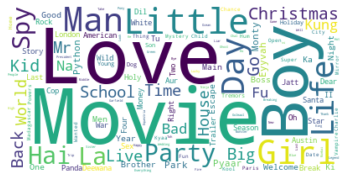

In [19]:
a = title_cloud(2016, ["Comedies"])

In [20]:
 from nltk.corpus import stopwords
 from collections import Counter
 words = " ".join(genres_df["title"].tolist())
 
stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

text = ' '.join([word for word in words.split() if word.lower() not in stopwords_dict])





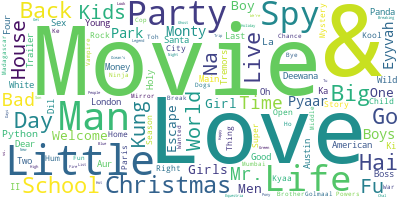

In [21]:
def title_cloud(year, cat):
    
    plot_df = (genres_df[genres_df["genres"].isin(cat)]
                .query(f"release_year <= @year"))
    

    words = " ".join(plot_df["title"].tolist())

    word_cloud = WordCloud(collocations = False, background_color = "white")
    
    stop_words = stopwords.words('english')
    stopwords_dict = Counter(stop_words)
    
    text = ' '.join([word for word in words.split() if word.lower() not in stopwords_dict])
    text = ''.join([i for i in text if not i.isdigit()])
    
    text = text.replace(":", "")
    freq = dict(Counter(text.split()))
    
    word_cloud.fit_words(freq)
    
    return word_cloud.to_image()

title_cloud(2016, ["Comedies"])


In [22]:
def title_cloud(year, cat):
    
    plot_df = (genres_df[genres_df["genres"].isin(cat)]
                .query(f"release_year <= @year"))
    

    words = " ".join(plot_df["title"].tolist())

    word_cloud = WordCloud(collocations = False, background_color = "white")
    
    stop_words = stopwords.words('english')
    stopwords_dict = Counter(stop_words)
    
    text = ' '.join([word for word in words.split() if word.lower() not in stopwords_dict])
    text = ''.join([i for i in text if not i.isdigit()])
    
    text = text.replace(":", "")
    freq = dict(Counter(text.split()))
    
    word_cloud.fit_words(freq)
    
    word_cloud_img = word_cloud.to_image()
    img = BytesIO()
    word_cloud_img.save(img, format = 'PNG')
    
    return "data:image/png;base64,{}".format(base64.b64encode(img.getvalue()).decode())

In [30]:
def title_cloud(year, cat):
    
    plot_df = (genres_df[genres_df["genres"].isin(cat)]
                .query(f"release_year <= @year"))
    

    words = " ".join(plot_df["title"].tolist())

    word_cloud = WordCloud(collocations = False, background_color = "white").generate(words)

    plt.figure()
    plt.imshow(word_cloud, interpolation = "bilinear");
    plt.axis("off")
    
    buf = BytesIO()
    plt.savefig(buf, format = "png", dpi=600, bbox_inches = 'tight', pad_inches = 0)
    
    return base64.b64encode(buf.getbuffer()).decode("utf8")





In [7]:
from dash import Dash, dcc, html, Input, Output
import dash_bootstrap_components as dbc

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import base64
import io
genres_df = pd.read_csv('df.csv')

def title_cloud(year, cat):
    
    plot_df = (genres_df[genres_df["genres"].isin(cat)]
                .query(f"release_year <= @year"))
    

    words = " ".join(plot_df["title"].tolist())

    word_cloud = WordCloud(collocations = False, background_color = "white").generate(words)

    plt.figure()
    plt.imshow(word_cloud, interpolation = "bilinear");
    plt.axis("off")
    
    buf = io.BytesIO()
    plt.savefig(buf, format = "png", dpi=600, bbox_inches = 'tight', pad_inches = 0)
    
    return base64.b64encode(buf.getbuffer()).decode("utf8")




### Fix Word Cloud

In [5]:
import dash_bootstrap_components as dbc
from dash import Dash, html, dcc, Output, Input, State
from vega_datasets import data
import altair as alt
import pandas as pd
from altair import datum
df = pd.read_csv("../data/processed/processed.csv")
genres_df = pd.read_csv('../data/processed/df.csv')
raw_data = pd.read_csv("../data/raw/netflix_titles.csv")
geocodes = pd.read_csv("../data/raw/world_country_latitude_and_longitude_values.csv")

In [54]:
def world_map(cat, rate, year):
    """
    Merges the processed data with country gecodes and
    plots a world map containing the number of movies and TV shows produced in a given year, genre and rating.
    
    Parameters
    ----------
    year: int, float
        Filter the data based on year that the movie/TV show is released.
        
    Returns
    -------
    altair.vegalite.v4.api.LayerChart
        A layered Altair chart containing the base world map and the size of number of movies and TV shows produced over the years.
    """

    # Explode "country" since some shows have multiple countries of production
    movie_exploded = (df.set_index(df.columns.drop("country", 1)
                                        .tolist()).country.str.split(',', expand = True)
                        .stack()
                        .reset_index()
                        .rename(columns = {0:'country'})
                        .loc[:, df.columns]
    )

    # Remove white space
    movie_exploded.country = movie_exploded.country.str.lstrip()
    movie_exploded.country = movie_exploded.country.str.rstrip()
    
    # Get count per country and release year
    count = (pd.DataFrame(movie_exploded.groupby(["country", 
                                                  "release_year", "genres", "rating"]).size())
        .reset_index()
        .rename(columns = {0 : "count"})
        )
    
    # Merge with geocodes
    count_geocoded = count.merge(geocodes, on = "country")
    count_geocoded = count_geocoded.rename(columns = {"latitude": "lat", 
                                                      "longitude": "lon"})
    
    # Drop unused columns
    count_geocoded = count_geocoded.drop(["usa_state_code", 
                                          "usa_state_latitude", 
                                          "usa_state_longitude", 
                                          "usa_state"], axis = 1)
    
    
    plot_df = count_geocoded[count_geocoded["rating"].isin(rate)]
    plot_df = (plot_df[plot_df["genres"].isin(cat)]
               .query(f"release_year <= @year"))       
        
    plot_df = plot_df.groupby(["country", "genres", "rating", "release_year"]).sum().reset_index()
    
    # Base map layer
    source = alt.topo_feature(data.world_110m.url, 'countries')
    base_map = alt.layer(
        alt.Chart(source).mark_geoshape(
            fill = 'black', 
            stroke = 'grey')
    ).project(
        'equirectangular'
    ).properties(width = 900, 
                 height = 400).configure_view(
                     stroke = None)
                 
    
    # Shows count size layer
    points = alt.Chart(plot_df).mark_point().encode(
    latitude = "lat",
    longitude = "lon",
    fill = alt.value("red"),
    size = alt.Size("count:Q", 
                    scale = alt.Scale(domain = [0, 70]),
                   legend = None),

    stroke = alt.value(None),
    tooltip = [alt.Tooltip("country", title = "Country"), 
               alt.Tooltip("release_year:Q", title = "Release Year"),
               alt.Tooltip("count:Q", title = "Count")]
)
    
    chart = (base_map + points).configure_view(
        strokeWidth = 0
        ).configure_mark(
            opacity = 0.8)
    return chart

In [57]:
world_map(["Dramas"], ["PG-13"], 2007)

alt.LayerChart(...)

In [46]:
movie_exploded = (df.set_index(df.columns.drop("country", 1)
                                        .tolist()).country.str.split(',', expand = True)
                        .stack()
                        .reset_index()
                        .rename(columns = {0:'country'})
                        .loc[:, df.columns]
    )
# Remove white space
movie_exploded.country = movie_exploded.country.str.lstrip()
movie_exploded.country = movie_exploded.country.str.rstrip()
    
# Get count per country and release year
count = (pd.DataFrame(movie_exploded.groupby(["country", 
                                                  "release_year", "genres", "rating"]).size())
        .reset_index()
        .rename(columns = {0 : "count"})
        )
    
    # Merge with geocodes
count_geocoded = count.merge(geocodes, on = "country")
count_geocoded = count_geocoded.rename(columns = {"latitude": "lat", 
                                                      "longitude": "lon"})
    
    # Drop unused columns
count_geocoded = count_geocoded.drop(["usa_state_code", 
                                          "usa_state_latitude", 
                                          "usa_state_longitude", 
                                          "usa_state"], axis = 1)

count_geocoded

,country,release_year,genres,rating,count,country_code,lat,lon
0,Afghanistan,2016,Documentaries,TV-MA,1,AF,33.939110,67.709953
1,Afghanistan,2016,International,TV-MA,1,AF,33.939110,67.709953
2,Albania,2018,Dramas,TV-MA,1,AL,41.153332,20.168331
3,Albania,2018,International,TV-MA,1,AL,41.153332,20.168331
4,Algeria,1979,Dramas,TV-MA,1,DZ,28.033886,1.659626
...,...,...,...,...,...,...,...,...
9265,Zimbabwe,2017,Comedies,TV-G,1,ZW,-19.015438,29.154857
9266,Zimbabwe,2017,Documentaries,TV-MA,2,ZW,-19.015438,29.154857
9267,Zimbabwe,2017,International,TV-G,1,ZW,-19.015438,29.154857
9268,Zimbabwe,2017,International,TV-MA,2,ZW,-19.015438,29.154857


In [90]:
plot_df = count_geocoded[count_geocoded["rating"].isin(["PG-13"])]
plot_df = (plot_df[plot_df["genres"].isin(["Dramas", "Comedies"])]
               .query(f"release_year <= 2017")) 

plot_df.groupby(["country", "genres", "rating", "release_year"]).sum().reset_index()

,country,genres,rating,release_year,count,lat,lon
0,Australia,Comedies,PG-13,2005,1,-25.274398,133.775136
1,Australia,Comedies,PG-13,2009,1,-25.274398,133.775136
2,Australia,Comedies,PG-13,2012,1,-25.274398,133.775136
3,Australia,Comedies,PG-13,2013,1,-25.274398,133.775136
4,Australia,Dramas,PG-13,2008,1,-25.274398,133.775136
...,...,...,...,...,...,...,...
186,United States,Dramas,PG-13,2013,6,37.090240,-95.712891
187,United States,Dramas,PG-13,2014,4,37.090240,-95.712891
188,United States,Dramas,PG-13,2015,9,37.090240,-95.712891
189,United States,Dramas,PG-13,2016,11,37.090240,-95.712891
